# Predictive Analysis: part 2 
## Complete workflow using  Linear Regression

This notebook is the second part of our predictive analysis workflow. 

>What we have seen in part 1:
>* define the **problem** at hand;
>* appreciate the importance of data **exploration**, through a number of methods and tools (e.g. study **feature correlations**);
>* appreciate **data preparation** and **curation** (adding/removing/aggregating features, creating numerical features, handling missing data);


> What´s included in this notebook (part 2):
>* perform **feature analysis**, to identify the most influential features;
>* get on with the **machine learning** process: 
    * **partitioning** the data in **training** and **testing** sets;
    * **train** the testing set, using **linear regression** to build a **regression model**;
    * **test** the regression model, using the testing set;
    * use some metrics for **evaluating the performance of the prediction model** at hand;


# The Predictive Analysis Work Flow
![PA Work Flow](./images/Predictive_Analysis_Flow1.png)



## Let´s reload our admissions.csv dataset


In [1]:
# Let's import our dataset
import pandas as pd
file_path = './data/admissions.csv'
df = pd.read_csv(file_path, header=0)

# Print out the first five entries of the dataset
# observe the features (columns), typical values (range), data types, etc.
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
# extract simple statistics for each feature
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Adding a New Column
To add a new column to our DataFrame object we can use the `df.insert` module to create a new column, and place it directly next to the CGPA column, for convenient comparison.

In [3]:
# GPA (scores 0-4) is a normalized version of CGPA (scores between 0 and 10)
# Create the new column "GPA", which equals 4*"CGPA"/10, and place it after the 6th column
df.insert(6,'GPA', 4*df['CGPA']/10)

# Let's always check that our changes have worked out ok.
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,3.860,9.65,1,0.92
1,2,324,107,4,4.0,4.5,3.548,8.87,1,0.76
2,3,316,104,3,3.0,3.5,3.200,8.00,1,0.72
3,4,322,110,3,3.5,2.5,3.468,8.67,1,0.80
4,5,314,103,2,2.0,3.0,3.284,8.21,0,0.65


### Exploring the Dataset: Features Correlations


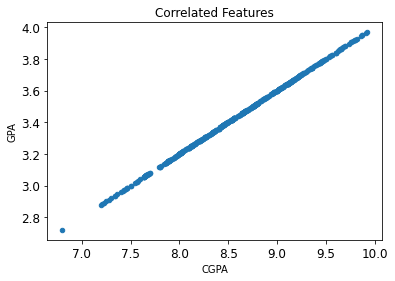

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot(x='CGPA', y='GPA', 
        kind='scatter',title='Correlated Features',fontsize=12)
plt.show()

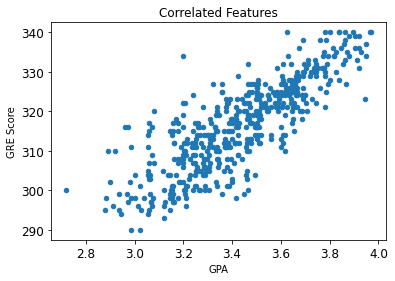

In [5]:
df.plot(x='GPA', y='GRE Score', 
        kind='scatter',title='Correlated Features',fontsize=12)
plt.show()

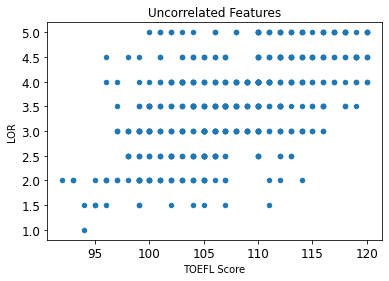

In [6]:
df.plot(x='TOEFL Score', y='LOR',
        kind='scatter',title='Uncorrelated Features',fontsize=12)
plt.show()

**Let's look at the correlation between 'TOEFL Score' and 'GRE Score'.**

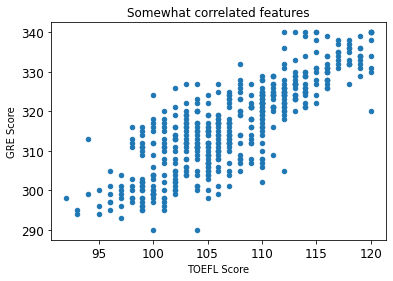

In [7]:
df.plot(x='TOEFL Score' ,y='GRE Score', 
        kind='scatter', title='Somewhat correlated features' , fontsize=12)
plt.show()

# Checkpoint - Exploratory Analysis
We have now accomplished a good part of this step, by loading the dataset and converting it into a `pandas.DataFrame` object. The conversion has enhanced our analysis capabilities. We have checked for feature correlations, computed simple statistics and have added a new feature (a new column).<br>

>But before we get into making predictions, we still need to **better analyse the features.** 

After that, we´ll be ready to select the most representative feature (or features), to make a model (or models) that allows for **predictions** to be made.
We are going to use `sklearn` to easily build **regression** models on different features. 

## Further exploring the dataset: Feature Analysis


## Using Scikit-Learn (pronounced cykit-learn)
Luckly for us, we don't need to learn all the math, because it's all included in the scikit-learn library (known as `sklearn`). This library includes several machine learning tools (see <a href="https://scikit-learn.org/stable/">webpage</a>!), including all sort of regression methods.<br>
What's left now is to learn how to use `sklearn` and use our time for analyzing the data. <br>
We have already loaded our dataset with `pandas`, creating the DataFrame of our dataset as **df**.

### Extracting the Response Term: what do you want to predict?
The **response** is the variable we eventually want to be able to predict. It is also referred to as the ***regressand***.

In [8]:
# Extract the regressand, Y, from the data frame
sampleData_Y = df.loc[:,'Chance of Admit']
sampleData_Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

### Extracting Our Observation Terms: which features can I use?
The **observations** are the feature values that we want to use to determine their relationship to the response, which is eventually to be used to make predictions. They are also known as the ***regressors***.

In [9]:
# Extract the regressors, X, from the data frame
sampleData_X  = df.loc[:,'Serial No.':'Research']
sampleData_X.columns
sampleData_X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,CGPA,Research
0,1,337,118,4,4.5,4.5,3.860,9.65,1
1,2,324,107,4,4.0,4.5,3.548,8.87,1
2,3,316,104,3,3.0,3.5,3.200,8.00,1
3,4,322,110,3,3.5,2.5,3.468,8.67,1
4,5,314,103,2,2.0,3.0,3.284,8.21,0


### Some features are more informative than others: which feature(s) should I use?
Often you may be confronted with many features. Yet, not all of them will be helpful for making predictions.<br>
An important task is to determine which feature(s) (i.e. the regressor columns) is most informative and most helpful for making predictions.
#### The F-test
In our example we are going to adopt the `F-test` to compute the significance of our features, with the aim to find the two best (most indicative) features.<br>
In regression the `F-test` compares the fits of different linear models. The F-test can assess multiple coefficients simultaneously.<br>
We use the `f_regression` module and the `SelectKBest` module to select the `k=2` features. Both modules are part of the `scikit-learn` package.<br>
**The SelectKBest class just scores the features using a function (in this case `f_regression` but could be others) and then "removes all but the k highest scoring features"**


In [10]:
from sklearn.feature_selection import SelectKBest, f_regression

k=2 # set the number of best-feature under scrutiny to 2
# you could set k to a higher number but computations will soon become overwhelming
# alway try to keep the problem/variables under control, don´t overdo.
# overdoing causes not only excessive computation but also the risk of overfitting

# create a handle to the feature selector
selector = SelectKBest(f_regression,k=k)

# fit to our sample data
selector.fit(sampleData_X, sampleData_Y)

# computes the best features (2 of them, because K=2)
best_feats = selector.get_support(indices=True)

# select the two columns corresponding to the best features
xTrain_best = sampleData_X.iloc[:,best_feats]

# show the best 2 features computed so far
xTrain_best.head()

,GPA,CGPA
0,3.860,9.65
1,3.548,8.87
2,3.200,8.00
3,3.468,8.67
4,3.284,8.21


### Let's draw some considerations
An interesting result is that the best two features are `GPA` and, then, `CGPA`. <br>
**Can we do even better?**<br>
Of course we can!! We have already seen that `CGPA` and `GPA` are highly correlated features (indeed one is the re-normalized version of the other). So we are working with two **redundant** features. 
**Let's eliminate `CGPA` from the dataset and repeat the whole feature selection process**. In this way we hope to find a second informative feature that is (hopefully) less correlated to `GPA`.

In [11]:
# Drop or delete 'CGPA' from the columns
newX_train = sampleData_X.drop('CGPA',axis=1)
newX_train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research
0,1,337,118,4,4.5,4.5,3.860,1
1,2,324,107,4,4.0,4.5,3.548,1
2,3,316,104,3,3.0,3.5,3.200,1
3,4,322,110,3,3.5,2.5,3.468,1
4,5,314,103,2,2.0,3.0,3.284,0


Now that the similar column has been dropped, **let's find the new top features!**

In [12]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression,k=k)
newX_feats = selector.fit_transform(newX_train, sampleData_Y)
best_feats = selector.get_support(indices=True)
xTrain_best = newX_train.iloc[:,best_feats]
xTrain_best.head()

,GRE Score,GPA
0,337,3.860
1,324,3.548
2,316,3.200
3,322,3.468
4,314,3.284


### Let's draw some considerations
**Let's notice something really interesting here!**
After removing the second best feature (`CGPA`), which was redundant, we have discovered a new best feature (`GRE Score`). This was somehow hidden in the previous computations. <br>
This shows, once more, the importance of the **exploratory** analysis that we have been doing **before starting with any fancy machine learning methods**.<br>
**We can make some more considerations, which are not always intuitive:**<br>
For instance, the `University Rating` feature doesn't appear in the top most informative features. However, this is the outcome of a merely **objective analysis** (based on the available data only).

Alternatively, we could make **subjective** considerations that correlate the ranking of a certain university with the probability of getting admission. <br>

>***For instance, would it be true that seeking admission to a lower-ranked university leads to a higher probability of admission?***<br>
According to this dataset, this is not necessarily true. 

## Next steps: Build, train and evaluate a linear regression model (on the best features)
We now have the most informative features for calculating the probability of getting accepted to a graduate school program, and the data has been separated into the $X$ and $Y$ sets.<br> 
>It is now time to import some modules to help us build, train, and evaluate a linear regression model:

# Step 3: Making predictions
![PA Work Flow4](./images/Predictive_Analysis_Flow4.png)

## Applications of Linear Regression: what is it and how is it typically used?
From trend lines to mortality rates, linear regression appears in virtually every field, due to its versatility. Linear regressions are a vital tool to any data scientist or data analyst due to their ability to capture accurate relationships using a relatively simple tool.<br>
>**Simplicity should be the ultimate goal when analyzing data!**

## Examples in Real-World Situations
Here are some examples of linear regressions applied in real-world situations!

#### GPA Example
<img src="./linear_regression_examples/gpa_ex.jpg" alt="Drawing" style="width: 300px;" />

#### Finance Example
<img src="./linear_regression_examples/salary_ex.png" alt="Drawing" style="width: 300px;" />

#### Medicine Example
<img src="./linear_regression_examples/medicine_ex.jpg" alt="Drawing" style="width: 300px;" />

## What is regression and what is it for?
**Regression refers to fitting some data to some function**, thus, realizing a relationship between variables that may not be obvious upon initial inspection.

We can describe one or more variables as a mathematical equation of one or more desired variables in the dataset. This allows individuals to be able to *predict* the value of variable, or response variable, using the present values of a model consisting of its terms. 
**In linear regression, we are aiming to fit our data to a line.**
>“It is likely that 90% or more of real-world applications of data mining end up with a relatively simple regression as the final model, typically after very careful data preparation, encoding, and creation of variables.” – James Wu and Stephen Coggeshall

##  A Tiny Bit of Math...
Consider the basic linear regression model to follow the syntax:

$$ Y = \beta X +\epsilon$$ 

Does the equation look familiar? It is simply the equation for a line, having **slope** $\beta$ and **intercept** $\epsilon$. This ability to describe a response with such simplicity is what makes the linear regression the perfect first tool for the data scientist.<br>
>**Check out this web page to play with linear regression:**
http://www.battaly.com/stat/geogebra/linearregression/

## Fitting data to a line is your very first machine learning algorithm

![regress in action](linear_regression_examples/regression_animated.gif "regress in action")

>### IMPORTANT: don't use the whole dataset for training.
> Otherwise, you´ll have no way for testing out your model.
> #### UNTESTED models are useless!

### Always partition your data into "training" and "testing" sets
***Wouldn't it make sense to use as much data as possible to build our model?***<br>
In general, we want to use as much data as possible. But if we use all data to build the model, how can we test it out?<br>
That's why we need to split our dataset into two subsets, to be used for training and testing, respectively. <br>
We'll show later on how to test the model's performance. <br>
Let's built it first.

![](./images/fig-holdout.png)

### How do we split a dataset in Python?
The `train_test_split` from `sklearn` separates the data and classes into the two sets by **randomly assigning samples** to either the training set or the testing set. 
> We wouldn´t want to pick samples manually, to avoid systematic error, bias, ... and the manual labor!

In [13]:
from sklearn.model_selection import train_test_split # Function for random splitting of data set
from sklearn import linear_model # Function to create linear regression models
from sklearn.metrics import mean_squared_error, r2_score # Functions used to evaluate models

In [14]:
# Partition the dataset into training and testing subset
xTrain, xTest, yTrain, yTest = train_test_split(xTrain_best, # First argument is the whole observation set including only the best features
                                                sampleData_Y, # Second is the corresponding regressand (Chance of Admit)
                                                test_size=0.33, # Use 33% of the samples for testing
                                                random_state=42) # The random state tells the function to use the 
                                                                 # same random samples whenever its assigned the 
                                                                 # number 42. So your experiments can be replicated

In [15]:
xTrain.head()

,GRE Score,GPA
471,311,3.236
26,322,3.520
7,308,3.160
453,319,3.504
108,331,3.752


In [16]:
xTest.head()

,GRE Score,GPA
361,334,3.816
73,314,3.616
374,315,3.060
155,312,3.476
104,326,3.620


### Let's finally create the regression model
Our data is ready for analysis but we still have no model! 
>**We can create the linear regression model using a single line of code from `sklearn`**

In [17]:
# Import the function to create linear regression model from the sklearn library
from sklearn import linear_model 

# Create linear regression instance and assign it to the variable 'linModel' 
linModel = linear_model.LinearRegression()

It is as easy as that. If you are curious about how to use different models, I implore you to visit the `sklearn` webpage previously linked. For more information on the model we just instantiated, such as parameters we could have used to characterize it, methods/functions it uses, etc., Python has a `help()` command. To use `help()`, type the command with function or object in query surrounded by single quotes inside the parentheses, like so:

In [18]:
# uncomment the next line to find out more about the LinearRegression package
#help('sklearn.linear_model.base.LinearRegression')

# Checkpoint -  Formulating a Solution Starting with Some Data Prep
* We've separated the data into our **response variable** (what we want to predict) and **observations* (what we use to make predictions upon);
* We've used F-score regression to select the **best features**, and observed how correlation affects which features are more informative;
* We've divided our dataset into **training** and **testing** samples to improve generalizability;
* We've created a **linear regression instance** <code>linModel</code> to be **trained** and **evaluated**.

## Training Our Regression
Now that model is created, we need to train it to find the best parameters for making predictions.  Recall that training the linear regression model is solving eq(4) for $\beta$ using the training samples in both $X$ and $Y$. To train the `linModel` we need to use it's `fit` method. This method takes the supplied inputs as $X$ and $Y$. Here is how to train the model:

In [19]:
# Train the model using the training dataset
linModel.fit(X=xTrain.values, y=yTrain.values)

LinearRegression()

> **You´ll find the model plotted against the actual data at the bottom of this notebook**

# Step 4: How can we assess the model accuracy?
![Pred Analysis Flow4](./images/Predictive_Analysis_Flow5.png)

## A quick preliminary test of our Regression
During the testing phase we supply the model with samples that it has never seen before. In this way we can evaluate how the model performs on data that has not been used for training.<br>
> **The testing set is our ground truth**

The following line is the command to test the linear regression model that was previously tuned: 

In [20]:
# Test the model
y_predLin = linModel.predict(xTest.values)

**Quick verification, to check how the model is performing**

In [21]:
#let's print the first few results
print("actual value", "predicted value")
i = 1
while i < 10:
    print(yTest.values[i],"       ", y_predLin[i])  
    i += 1

actual value predicted value
0.84         0.7870803435247902
0.39         0.5752484917998542
0.77         0.725995866206359
0.74         0.8299055148456802
0.89         0.8681015208025398
0.47         0.4753174309399679
0.57         0.6540873585939513
0.68         0.8287160540723504
0.82         0.7798416788842328


## The Metrics for Evaluating Performance
Now that we have a linear regression model we need to see how accurate it is. We can do this by calculating the difference between our predictions made on the test set, and their actual chance of admittance using the `mean_squared_error` module from the `sckit-learn` package.

In [22]:
mseLin = mean_squared_error(yTest.values, y_predLin)
print('The Mean Squared Error = {0:.3f}'.format(mseLin))

The Mean Squared Error = 0.004


### How did we do according to MSE?
The Mean Squared Error (MSE) was 0.004, or 0.4%, which means our accuracy is approximately 99.6%. That means our model is decent. Depending on the application, a "good" error result is relative to the task and the dataset provided. For instance, medical diagnosis may wish to have an accuracy closer to 98%.

### What's the MSE?

In statistics, the mean squared error (MSE) of an **estimator** (of a procedure for estimating an unobserved quantity) measures the **average of the squares of the errors** —that is, the average squared difference between the estimated values and the actual value. MSE is a **risk function**, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.

![](./images/MSE.png)

>#### The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.
The larger the number the larger the error. Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3)
We square each difference (pred(yn) – yn)) ** 2 so that **negative and positive values do not cancel each other out.**



### The $R^{2}$ (pronounced r-squared) i.e. the coefficient of determination (regression score function)
Another metric used for model evaluation is $R^{2}$ (computed as the square of the correlation coefficient).<br>
$R^{2}$ **gives you an idea of how many data points fall within the results of the line formed by the regression equation.**<br>
$R^{2}$ is **the proportion of the variation in the dependent variable that is predictable from the independent variable (or variables).** It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. Or, in other words, **it is the amount of explained variance compared to the total variance.**

**R-squared = Explained variation / Total variation**

**R-squared is comprised between 0 and 100%:**
- 0% indicates that the model explains none of the variability of the response data around its mean.
- 100% indicates that the model explains all the variability of the response data around its mean.

This idea is captured in the image below.  

![R2Explained](./images/r2_explained.PNG)

The regression model on the left accounts for 38.0% of the variance while the one on the right accounts for 87.4%. The more variance that is accounted for by the regression model the closer the data points will fall to the fitted regression line. Theoretically, if a model could explain 100% of the variance, the fitted values would always equal the observed values and, therefore, all the data points would fall on the fitted regression line.

### $R^{2}$ vs correlation
While **correlation explains the strength of the relationship** between an independent and dependent variable, **R-squared explains to what extent the variance of one variable explains the variance of the second variable.**<br>
So, if the $R^{2}$ of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.



>In Python, we can use `r2_score` to calculate this value. Once again, the significance of this value is application specific, so there is no one good $R^{2}$ value that works for all cases. **Values closer to 1 are better.**


In [23]:
# Approximate the variance of error
r2_Lin = r2_score(yTest.values, y_predLin)
print('Goodness of Fit: {0:.3f}'.format(r2_Lin))

Goodness of Fit: 0.796


### Take-away
An R-squared of 100% means that all movements of a dependent variable (or variables) are completely explained by movements in the independent variable(s).

### The Model Coefficients
Now that we have an idea of the model's performance we can observe the parameters, or coefficients, of the linear regression. 

In [24]:
# The model's coefficients
print('Coefficients(slope, bias): ', linModel.coef_)

Coefficients(slope, bias):  [0.0034397  0.38717906]


## Examining the Effects of Each Variable
The linear regression model previously created uses two features to approximate a single line. This can be difficult to visualize, so another means of examining the impact of the features on the regression is by seeing how the regression fits the two features individually.

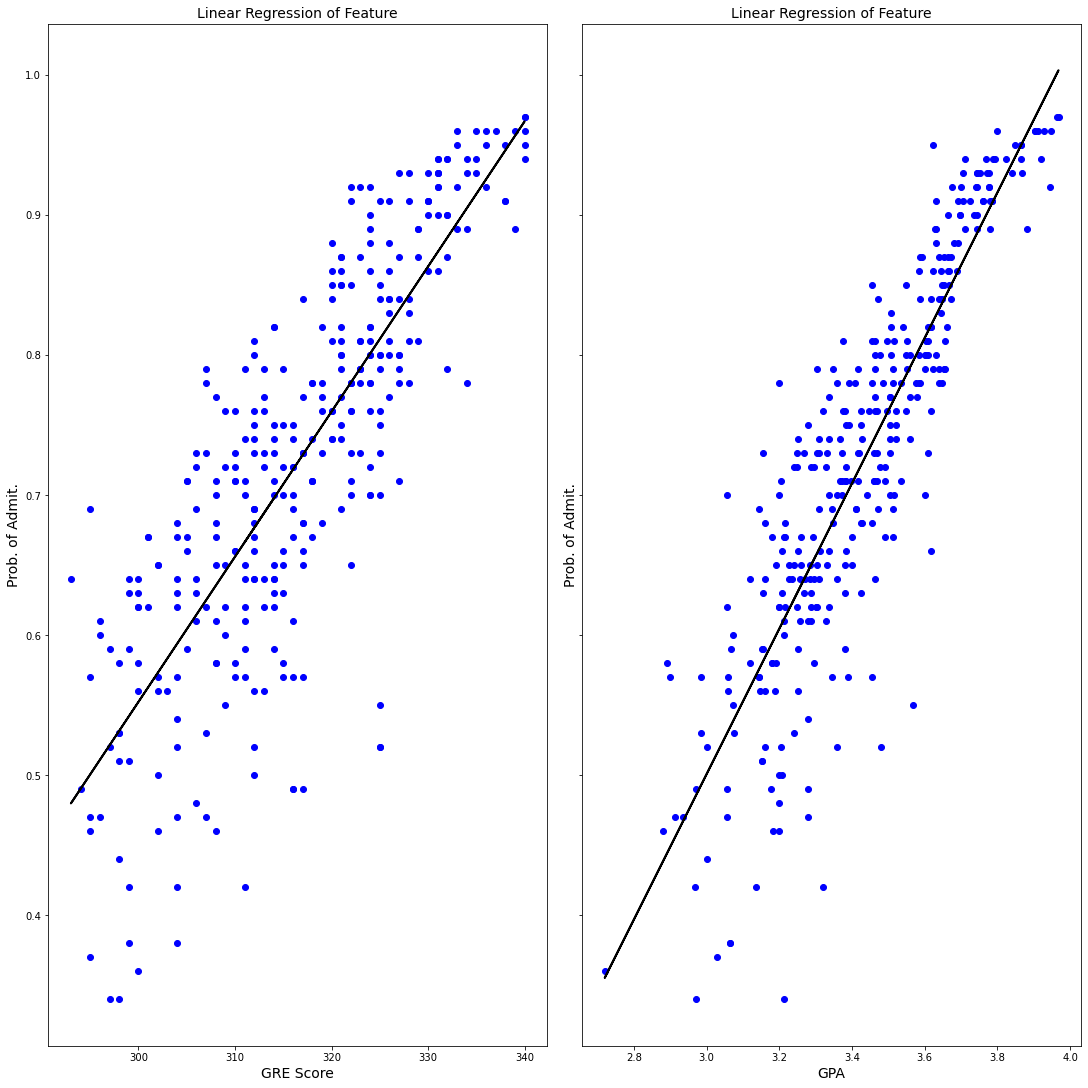

In [25]:
import numpy as np
fig, axes = plt.subplots(1,len(xTrain.columns.values),sharey=True,constrained_layout=True,figsize=(15,15))
for i,e in enumerate(xTrain.columns):
  linModel.fit(xTrain[e].values[:,np.newaxis], yTrain.values)
  axes[i].set_title("Linear Regression of Feature", fontsize=14)
  axes[i].set_xlabel(str(e), fontsize=14)
  axes[i].set_ylabel('Prob. of Admit.', fontsize=14)
  axes[i].scatter(xTrain[e].values[:,np.newaxis], yTrain.values,color='b')
  axes[i].plot(xTrain[e].values[:,np.newaxis], 
  linModel.predict(xTrain[e].values[:,np.newaxis]),color='k', linewidth=2)
plt.show()